In [1]:
import pandas as pd

hpa_df = pd.read_csv('/home/martin/projects/hpa_image_analysis/data/colon_enhanced.csv')
hpa_df.head()

,Unnamed: 0,antibody,antibody_hpa_literature_concordance,antibody_icc_if_verification,antibody_ihc_verification,antibody_proteinarray_verification,antibody_westernblot_verification,cell_type,disease_type,gene,healthy_status,hpa_patientID,hpa_tissue_description_list,intensity,organ,quantity,s3_aws_urls,snomedCode_List,staining,subcellular_location
0,662,HPA037779,Consistent with gene/protein characterization ...,NaN,enhanced,approved,supported,NaN,colorectal cancer,A1CF,False,1811,"['Adenocarcinoma, NOS', 'Colon', 'Adenocarcino...",Weak,colon,NaN,https://krzysztof-images.s3.amazonaws.com/hpa_...,NaN,Low,"cytoplasmic/membranous,nuclear"
1,663,HPA037779,Consistent with gene/protein characterization ...,NaN,enhanced,approved,supported,NaN,colorectal cancer,A1CF,False,1898,"['Adenocarcinoma, NOS', 'Colon', 'Adenocarcino...",Negative,colon,NaN,https://krzysztof-images.s3.amazonaws.com/hpa_...,NaN,Not detected,none
2,664,HPA037779,Consistent with gene/protein characterization ...,NaN,enhanced,approved,supported,NaN,colorectal cancer,A1CF,False,2616,"['Adenocarcinoma, NOS', 'Colon']",Negative,colon,NaN,https://krzysztof-images.s3.amazonaws.com/hpa_...,NaN,Not detected,none
3,665,HPA037779,Consistent with gene/protein characterization ...,NaN,enhanced,approved,supported,NaN,colorectal cancer,A1CF,False,2931,"['Adenocarcinoma, NOS', 'Colon', 'Adenocarcino...",Negative,colon,NaN,https://krzysztof-images.s3.amazonaws.com/hpa_...,NaN,Not detected,none
4,666,HPA037779,Consistent with gene/protein characterization ...,NaN,enhanced,approved,supported,NaN,colorectal cancer,A1CF,False,4089,"['Adenocarcinoma, NOS', 'Colon']",Negative,colon,NaN,https://krzysztof-images.s3.amazonaws.com/hpa_...,NaN,Not detected,none


In [2]:
target_df = pd.read_csv('target_indication.tsv', delimiter='\t')
target_df.head()

,MSH,ensembl_id,lApprovedUS.EU,Phase.Latest,First.Added,Inactive,symbol
0,"Abortion, Spontaneous",ENSG00000119535,False,unknown,NaN,True,CSF3R
1,Acidosis,ENSG00000151617,False,Phase I Clinical Trial,2012-10-27,False,EDNRA
2,Acne Vulgaris,ENSG00000012779,False,Phase II Clinical Trial,NaN,True,ALOX5
3,Acne Vulgaris,ENSG00000026508,False,Approved,NaN,False,CD44
4,Acne Vulgaris,ENSG00000057252,False,unknown,2009-07-01,True,SOAT1


In [43]:
colon_target_df = target_df[target_df['MSH']=='Colorectal Neoplasms']

In [58]:
colon_target_df[colon_target_df['Inactive']==False]['symbol'].to_list()

['CD38',
 'PROM1',
 'SELE',
 'CD9',
 'BTK',
 'FYN',
 'BIRC3',
 'TYMP',
 'TNFRSF9',
 'NUAK1',
 'MKNK1',
 'ARG2',
 'XPO1',
 'LAG3',
 'IL12RB1',
 'CDC7',
 'MKNK2',
 'MAPK1',
 'ST13',
 'CD40',
 'XIAP',
 'PORCN',
 'MSLN',
 'MAPK3',
 'CD276',
 'AKT2',
 'TYK2',
 'JAK3',
 'CDK6',
 'NAMPT',
 'OGDH',
 'NUDT1',
 'TGFBR1',
 'ENG',
 'CXCL12',
 'TNKS2',
 'DDX5',
 'BIRC2',
 'MAPK14',
 'IL17A',
 'IL12B',
 'FGF1',
 'CSNK1A1',
 'BCL6',
 'UMPS',
 'IL1A',
 'EPAS1',
 'ARG1',
 'CSF3R',
 'CD274',
 'TNFSF10',
 'BMP4',
 'KIR2DL1',
 'IL37',
 'ADORA2A',
 'SMO',
 'IDO1',
 'PDHA1',
 'CDK8',
 'CCNB1',
 'MDM2',
 'IL6',
 'IL10',
 'KLF4',
 'CCL21',
 'LHCGR',
 'CD27',
 'LGR5',
 'SSTR1',
 'BRD4',
 'MCL1',
 'AGTR1',
 'TPBG',
 'GNRH1',
 'DRD2',
 'EIF4E',
 'TNIK',
 'CCR5',
 'FGFR4',
 'TNFSF13',
 'SSTR5',
 'FSTL1',
 'CTLA4',
 'MST1R',
 'TLR3',
 'VCP',
 'WRN',
 'WEE1',
 'ANPEP',
 'STAT3',
 'IL12A',
 'FASN',
 'PTGER4',
 'TNKS',
 'ATP2A2',
 'CD28',
 'THBD',
 'SSTR2',
 'CHEK2',
 'DIABLO',
 'CSF1',
 'GAST',
 'TMEM173',
 'RXRA',


# Step 1
## Summarize HPA annotation of subcellular localization change to gene level


In [4]:
hpa_df['disease_status'] = hpa_df.apply(lambda row: row['s3_aws_urls'].split('/')[6], axis=1)
hpa_df['disease_status'].unique()

array(['pathology_tissue', 'healthy_tissue'], dtype=object)

In [19]:
healthy_protein_loc = hpa_df[hpa_df['disease_status']=='healthy_tissue'].groupby(['gene', 'subcellular_location']).count().reset_index()[['gene', 'subcellular_location']]
pathology_protein_loc = hpa_df[hpa_df['disease_status']=='pathology_tissue'].groupby(['gene', 'subcellular_location']).count().reset_index()[['gene', 'subcellular_location']]

In [33]:
healthy_loc_dict = {}
for gene, group in healthy_protein_loc.groupby('gene'):
    healthy_loc_dict[gene] = group['subcellular_location'].to_list()

pathology_loc_dict = {}
for gene, group in hpa_df[hpa_df['disease_status']=='pathology_tissue'].groupby('gene'):
    pathology_loc_dict[gene] = group['subcellular_location'].to_list()

In [34]:
pathology_loc_dict['A1CF']

['cytoplasmic/membranous,nuclear',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'none',
 'cytoplasmic/membranous,nuclear',
 'nuclear',
 'none',
 'nuclear',
 'none',
 'cytoplasmic/membranous,nuclear',
 'none',
 'cytoplasmic/membranous',
 'nuclear',
 'cytoplasmic/membranous,nuclear',
 'cytoplasmic/membranous,nuclear']

In [38]:
diff_list = []
for gene in pathology_loc_dict.keys():
    if not gene in healthy_loc_dict.keys():
        continue
    gene_dif_list = []
    for loc in pathology_loc_dict[gene]:
        if not loc in healthy_loc_dict[gene]:
            gene_dif_list.append(loc)
    diff_list.append([gene, healthy_loc_dict[gene], pathology_loc_dict[gene], gene_dif_list, len(gene_dif_list)/len(pathology_loc_dict[gene])])    
            

In [40]:
diff_df = pd.DataFrame(diff_list, columns=['gene', 'healthy_loc', 'path_loc', 'diff_loc', 'fraction_diff'])
diff_df.head()

,gene,healthy_loc,path_loc,diff_loc,fraction_diff
0,A1CF,"[cytoplasmic/membranous,nuclear]","[cytoplasmic/membranous,nuclear, none, none, n...","[none, none, none, none, none, none, none, nuc...",0.736842
1,A2ML1,[none],"[none, cytoplasmic/membranous, none, none, cyt...","[cytoplasmic/membranous, cytoplasmic/membranou...",0.190476
2,A4GNT,[none],"[none, none, none, none, none, none, nuclear, ...",[nuclear],0.090909
3,AADAT,[cytoplasmic/membranous],"[none, none, none, none, none, none, none, none]","[none, none, none, none, none, none, none, none]",1.000000
4,AAK1,[none],"[none, none, none, none, none, none, none, non...",[],0.000000


In [60]:
from evaluation import plot_roc_curve
diff_df['is_drug_target'] = diff_df.apply(lambda row: 1 if row['gene'] in colon_target_df['symbol'].to_list() else 0, axis=1)
diff_df['approved'] = diff_df.apply(lambda row: 1 if row['gene'] in colon_target_df[colon_target_df['lApprovedUS.EU']==True]['symbol'].to_list() else 0, axis=1)
diff_df['active'] = diff_df.apply(lambda row: 1 if row['gene'] in colon_target_df[colon_target_df['Inactive']==False]['symbol'].to_list() else 0, axis=1)

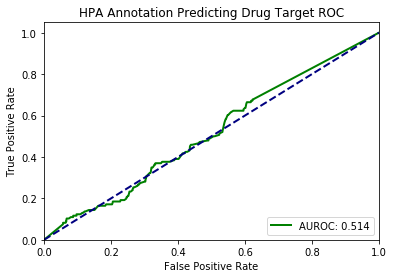

In [50]:
plot_roc_curve(diff_df['is_drug_target'], diff_df['fraction_diff'], 'HPA Annotation Predicting Drug Target ROC')

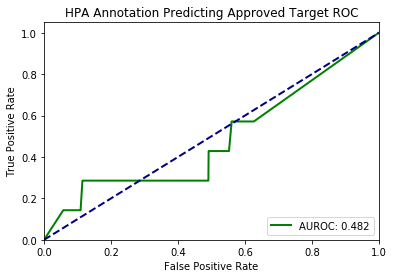

In [70]:
plot_roc_curve(diff_df['approved'], diff_df['fraction_diff'], 'HPA Annotation Predicting Approved Target ROC')

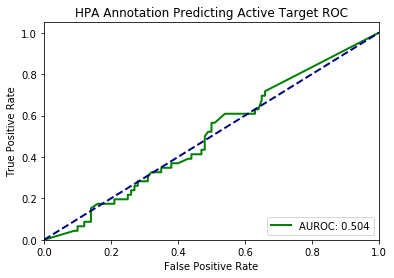

In [68]:
target_diff_df = diff_df[diff_df['is_drug_target']==1]
plot_roc_curve(target_diff_df['active'], target_diff_df['fraction_diff'], 'HPA Annotation Predicting Active Target ROC')